In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.api as sm

In [4]:
#load the data
tips=sns.load_dataset('tips')

In [6]:
print(tips.head())# display the first five rows

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [40]:
#encode categorical variable'sex' to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
tips['sex'] = label_encoder.fit_transform(tips['sex'])

In [44]:
# Check for missing values
print("Missing values in dataset:", tips.isnull().sum())

Missing values in dataset: total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [46]:
# Select independent variables and dependent variable
x = tips[['total_bill']]     # numerical feature
x1 = tips[['sex']]           # encoded categorical feature
y = tips['tip']              # target variable

In [54]:
# Combine all independent variables first
X = pd.concat([x, x1], axis=1)  # Combine 'total_bill' and 'sex'

# Then split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Handle missing values (if any)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [59]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [63]:
# Evaluate the model
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.54311158645923
Mean Squared Error: 0.5710974249131131


In [73]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.10678783 0.02233036]
Intercept: 0.914247986993141


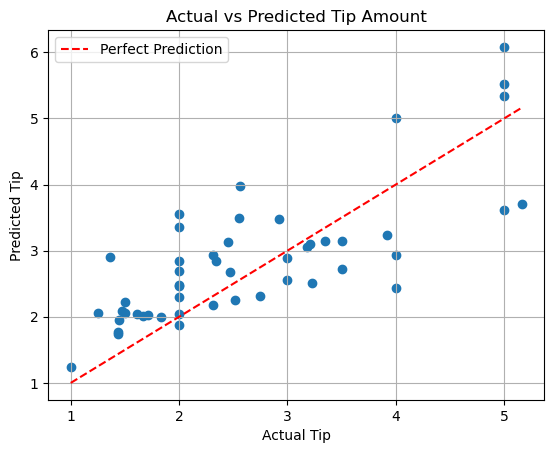

In [67]:
# Optional: Visualizing predicted vs actual tips
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Actual vs Predicted Tip Amount")

# Add a reference line (y = x) to show perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

Key Insights:
1. The R² score is moderate, indicating that the model explains some but not all of the variation in tip amounts.
2. Including 'sex' as a feature had minimal impact, suggesting gender has little influence on tipping in this dataset.
3. Adding more relevant features like 'smoker', 'day', or 'time' could improve model accuracy and better capture tipping behavior.